In [1]:
from typing import List

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools




Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999663 | 0.000126079 | 0.999467  | 0.999823 |
| recall__class_0    | 0.996993 | 0.000786017 | 0.99548   | 0.997871 |
| f1-score__class_0  | 0.998326 | 0.000420209 | 0.997558  | 0.998846 |
| precision__class_1 | 0.129045 | 0.0546217   | 0.0576923 | 0.225806 |
| recall__class_1    | 0.552778 | 0.172133    | 0.25      | 0.777778 |
| f1-score__class_1  | 0.20799  | 0.0832824   | 0.1       | 0.35     |
| accuracy           | 0.996659 | 0.000837308 | 0.995129  | 0.997695 |
| auc                | 0.943784 | 0.0440374   | 0.865928  | 0.998103 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


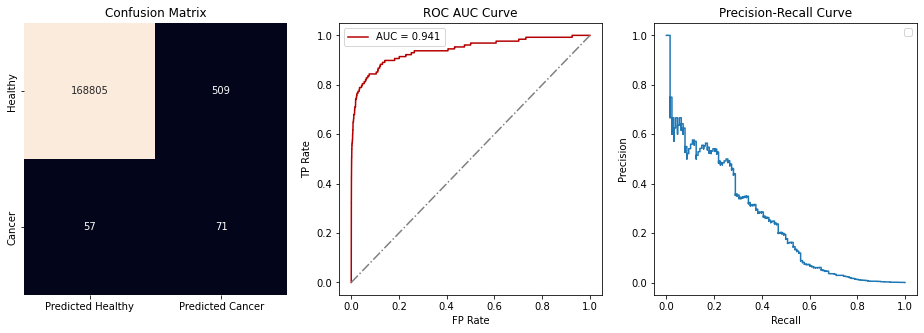

In [2]:
single_cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [3]:
single_test_cols = single_cv_analytics_util.analytics_utils[0].data_util.test_df.columns.to_list()

In [4]:
len(single_test_cols)

152

In [5]:
id_col = 'index'
label = 'cancer_in_next_1_years'
id_and_confidence = []
for analytics_util in single_cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
    X_test_mismatch = X_test.copy()
    y_pred, y_prob = analytics_util.get_predictions() 
    X_test_mismatch[f'{label}_pred'] = y_pred
    X_test_mismatch[f'{label}_prob'] = y_prob
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] == 1]
    id_and_confidence.append(X_test_mismatch)
mid_conf_predictions = pd.concat(id_and_confidence)



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999538  | 0.000231329 | 0.999016 | 0.999823 |
| recall__class_0    | 0.996637  | 0.000857611 | 0.995399 | 0.998152 |
| f1-score__class_0  | 0.998085  | 0.000428087 | 0.997233 | 0.998767 |
| precision__class_1 | 0.0835833 | 0.0602229   | 0        | 0.176471 |
| recall__class_1    | 0.38277   | 0.241106    | 0        | 0.777778 |
| f1-score__class_1  | 0.133621  | 0.0912577   | 0        | 0.285714 |
| accuracy           | 0.996179  | 0.00085284  | 0.994482 | 0.997538 |
| auc                | 0.825113  | 0.109238    | 0.649522 | 0.982172 |
+--------------------+-----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


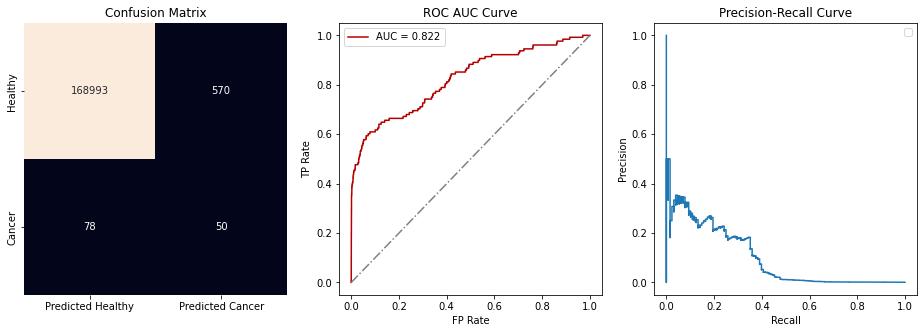

In [6]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [7]:
cv_analytics_util.store_cv_results()



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999538  | 0.000231329 | 0.999016 | 0.999823 |
| recall__class_0    | 0.996637  | 0.000857611 | 0.995399 | 0.998152 |
| f1-score__class_0  | 0.998085  | 0.000428087 | 0.997233 | 0.998767 |
| precision__class_1 | 0.0835833 | 0.0602229   | 0        | 0.176471 |
| recall__class_1    | 0.38277   | 0.241106    | 0        | 0.777778 |
| f1-score__class_1  | 0.133621  | 0.0912577   | 0        | 0.285714 |
| accuracy           | 0.996179  | 0.00085284  | 0.994482 | 0.997538 |
| auc                | 0.825113  | 0.109238    | 0.649522 | 0.982172 |
+--------------------+-----------+-------------+----------+----------+




Cross-Validation measures:
+--------------------+------------+-------------+-------------+-----------+
|                    |       mean |         std |         min |       max |
|--------------------+------------+-------------+-------------+-----------|
| precision__class_0 | 0.99968    | 0.000210977 | 0.99915     | 1         |
| recall__class_0    | 0.917574   | 0.0135507   | 0.893594    | 0.942707  |
| f1-score__class_0  | 0.95682    | 0.00730193  | 0.943675    | 0.970108  |
| precision__class_1 | 0.00576719 | 0.00284016  | 0.000960615 | 0.0118407 |
| recall__class_1    | 0.611703   | 0.217651    | 0.166667    | 1         |
| f1-score__class_1  | 0.0114073  | 0.00558627  | 0.00191022  | 0.0233298 |
| accuracy           | 0.917339   | 0.0134451   | 0.893404    | 0.941972  |
| auc                | 0.825113   | 0.109238    | 0.649522    | 0.982172  |
+--------------------+------------+-------------+-------------+-----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


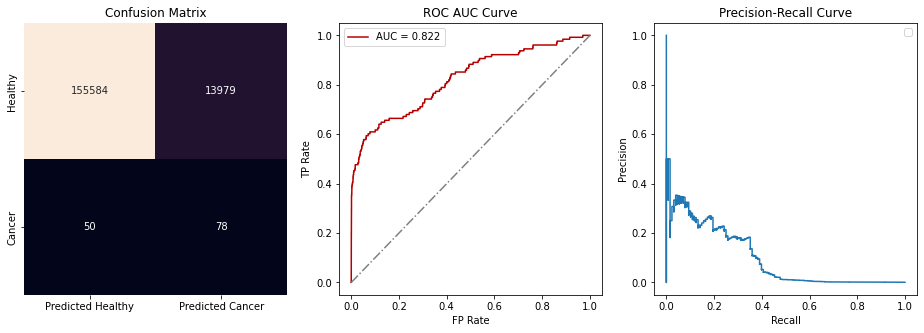

In [8]:
cv_analytics_util.update_thresholds(0.03)
cv_analytics_util.get_cv_report();
cv_analytics_util.display_graph()

In [9]:
test_cols = cv_analytics_util.analytics_utils[0].data_util.test_df.columns.to_list()

In [10]:
for col in test_cols:
    if col not in single_test_cols:
        print(col)

In [11]:
from oop_functions.util_functions import summarize_features, print_df, convert_numeric_to_float16

processed_data = pd.read_csv('./processed_dataset/recent_propagated_dataset.csv', index_col=0)
processed_data = convert_numeric_to_float16(processed_data)

In [12]:
processed_data[processed_data['ovar_cancer_years']  < processed_data['ovar_observe_year']][['ovar_cancer_years', 'study_yr', 'cancer_in_next_1_years', 'ovar_observe_year']]

,ovar_cancer_years,study_yr,cancer_in_next_1_years,ovar_observe_year


In [13]:

processed_data['ca125ii_level_binary'] = np.nan
processed_data.loc[processed_data['ca125ii_level'] < 35, 'ca125ii_level_binary'] = 1
processed_data.loc[processed_data['ca125ii_level'] >= 35 , 'ca125ii_level_binary'] = 2

In [14]:
# TODO: fix this one

In [15]:
cv_analytics_util.analytics_utils[0].data_util.imputer.impute_mean_cols == single_cv_analytics_util.analytics_utils[0].data_util.imputer.impute_mean_cols

True

In [16]:
full_dataset_single_original = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')

In [17]:
# Create a copy of the whole dataset
label = 'cancer_in_next_1_years'
full_dataset = []
for analytics_util in cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df
    full_dataset.append(X_test.copy())
full_dataset = pd.concat(full_dataset)
processed_data = processed_data[full_dataset.columns]
full_dataset = processed_data[processed_data[id_col].isin(full_dataset[id_col])]


In [18]:
df_1 = single_cv_analytics_util.analytics_utils[0].data_util.test_df

In [19]:
df_1[df_1['cancer_in_next_1_years'] == 1][['index']]

,index
228,104.0
1423,116523.0
3063,1466.0
3211,191453.0
3806,79069.0
4443,117192.0
4781,154676.0
7854,79967.0


In [20]:
# single_cv_analytics_util.analytics_utils[0].data_util.test_df.columns == full_dataset.columns

In [21]:
single_cv_analytics_util.analytics_utils[0].data_util.imputer.imputer_mean.statistics_[-61]

0.10235847193141864

In [22]:
single_cv_analytics_util.analytics_utils[0].data_util.imputer.impute_mean_cols

['pregc',
 'lantero_p',
 'ovary_trial_flag',
 'study_yr',
 'bmi_20',
 'fchilda',
 'height_f',
 'ovary_vol',
 'rsmoker_f',
 'bmi_20c',
 'polyps_f',
 'ovary_volr',
 'echo',
 'race7',
 'detr_p',
 'rantero_p',
 'livec',
 'thorm',
 'bbd',
 'bmi_50',
 'hearta_f',
 'index',
 'age',
 'ovary_diaml',
 'stillb',
 'ovar_cancer',
 'usound_history',
 'maxdi',
 'pipe',
 'cig_stop',
 'ovcyst_diam',
 'rtran_p',
 'brothers',
 'ovar_behavior',
 'ca125ii_level_binary',
 'cystw',
 'hyperten_f',
 'arthrit_f',
 'bmi_curr',
 'cancer_in_next_1_years',
 'bronchit_f',
 'ca125_result',
 'agelevel',
 'menstrs_stat_type',
 'weight_f',
 'ibuppd',
 'divertic_f',
 'ltran_p',
 'osteopor_f',
 'rlong_p',
 'fmenstr',
 'cigpd_f',
 'hyster_f',
 'sisters',
 'post_menopausal',
 'marital',
 'was_screened',
 'ovar_result',
 'prega',
 'bmi_curc',
 'asp',
 'breast_fh',
 'educat',
 'benign_ovcyst',
 'ovarsumm_fh',
 'cig_stat',
 'liver_comorbidity',
 'uterine_fib',
 'ovary_voll',
 'bmi_50c',
 'ovary_diam',
 'curhorm',
 'bcontra',
 

In [23]:
# full_dataset = full_dataset_single_original

In [24]:
# Add those records to the test datasets of the single label dataset and test its validity
for analytics_util in single_cv_analytics_util.analytics_utils:
    # print(analytics_util.data_util.test_df.shape)
    idx = analytics_util.data_util.test_df['plco_id'].to_list()
    # print((full_dataset[full_dataset['plco_id'].isin(idx)].shape))
    analytics_util.data_util.test_df = full_dataset[full_dataset['plco_id'].isin(idx)]
    analytics_util.data_util.test_df = analytics_util.data_util.imputer.imputer_transform(analytics_util.data_util.test_df)


In [25]:
df_2 = single_cv_analytics_util.analytics_utils[0].data_util.test_df

In [26]:
df_1[df_1['index'] == 228522]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,uterine_fib,visboth,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f
3761,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,10.03125,1.0,127.0,118.0,125.0


In [27]:
df_2[df_2['index'] == 228522]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,uterine_fib,visboth,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f
228522,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,10.028363,1.0,127.0,118.0,125.0


In [28]:
# Add those records to the test datasets of the single label dataset and test its validity
# for analytics_util in single_cv_analytics_util.analytics_utils:
#     idx = analytics_util.data_util.train_df['index'].to_list()
#     analytics_util.data_util.train_df = full_dataset[full_dataset['index'].isin(idx)]
#     analytics_util.data_util.train_df = analytics_util.data_util.imputer.imputer_transform(analytics_util.data_util.train_df)
#     analytics_util.fit()




Cross-Validation measures:
+--------------------+------------+-------------+-------------+------------+
|                    |       mean |         std |         min |        max |
|--------------------+------------+-------------+-------------+------------|
| precision__class_0 | 0.999588   | 0.000153112 | 0.999345    | 0.999788   |
| recall__class_0    | 0.814613   | 0.0212289   | 0.783099    | 0.853928   |
| f1-score__class_0  | 0.89753    | 0.0128728   | 0.87814     | 0.920988   |
| precision__class_1 | 0.00227229 | 0.000750698 | 0.000908265 | 0.0035     |
| recall__class_1    | 0.552778   | 0.172133    | 0.25        | 0.777778   |
| f1-score__class_1  | 0.00452571 | 0.00149451  | 0.00180995  | 0.00696864 |
| accuracy           | 0.814417   | 0.0212008   | 0.782831    | 0.853587   |
| auc                | 0.755137   | 0.0715729   | 0.64985     | 0.869051   |
+--------------------+------------+-------------+-------------+------------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


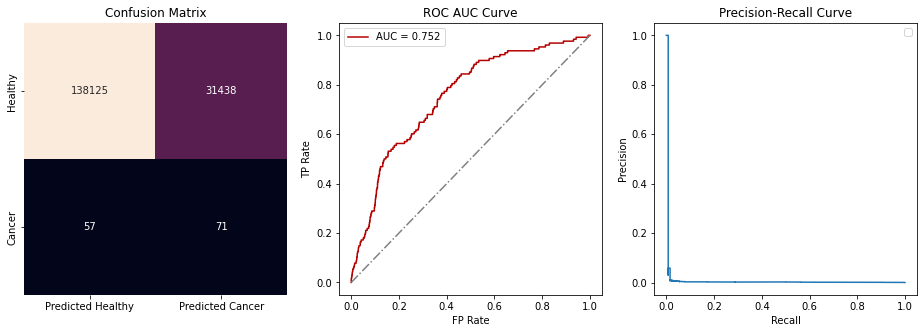

In [29]:
single_cv_analytics_util.update_thresholds(0.5)
single_cv_analytics_util.get_cv_report();
single_cv_analytics_util.display_graph()

In [30]:
full_dataset_single_new = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')

In [31]:
plco_id = 228522

In [32]:
full_dataset_single_new[full_dataset_single_new['cancer_in_next_1_years_prob'] > 0.9]['index']

26            26.0
29            29.0
45            45.0
104          104.0
232          232.0
            ...   
264673    264673.0
264676    264676.0
264683    264683.0
264684    264684.0
264700    264700.0
Name: index, Length: 19110, dtype: float64

In [33]:
processed_data[processed_data['index'] == plco_id]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,uterine_fib,visboth,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f
228522,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,NaN,1.0,127.0,118.0,125.0


In [34]:
full_dataset_single_original[full_dataset_single_original['index'] == plco_id]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f,cancer_in_next_1_years_pred,cancer_in_next_1_years_prob
3761,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,0.0,0.0,0.0,10.03125,1.0,127.0,118.0,125.0,1,0.586524


In [35]:
full_dataset_single_new[full_dataset_single_new['index'] == plco_id]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f,cancer_in_next_1_years_pred,cancer_in_next_1_years_prob
228522,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,0.0,0.0,0.0,10.028363,1.0,127.0,118.0,125.0,1,0.586524


In [36]:
id_col = 'index'
label = 'cancer_in_next_1_years'
id_and_confidence = []
for analytics_util in cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
    X_test_mismatch = X_test.copy()
    y_pred, y_prob = analytics_util.get_predictions() 
    X_test_mismatch[f'{label}_pred'] = y_pred
    X_test_mismatch[f'{label}_prob'] = y_prob
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] == 1]
    id_and_confidence.append(X_test_mismatch)
mid_conf_predictions_2 = pd.concat(id_and_confidence)

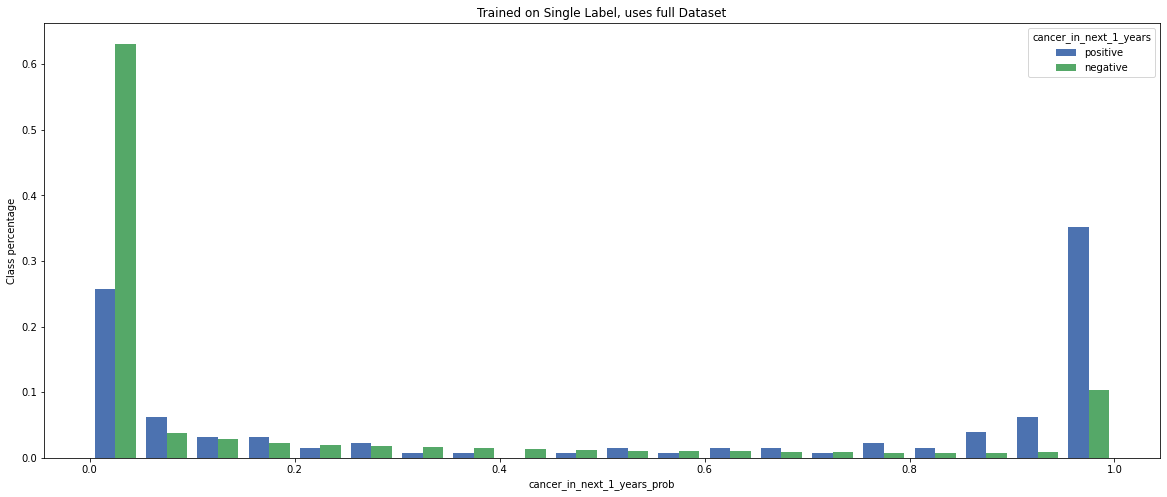

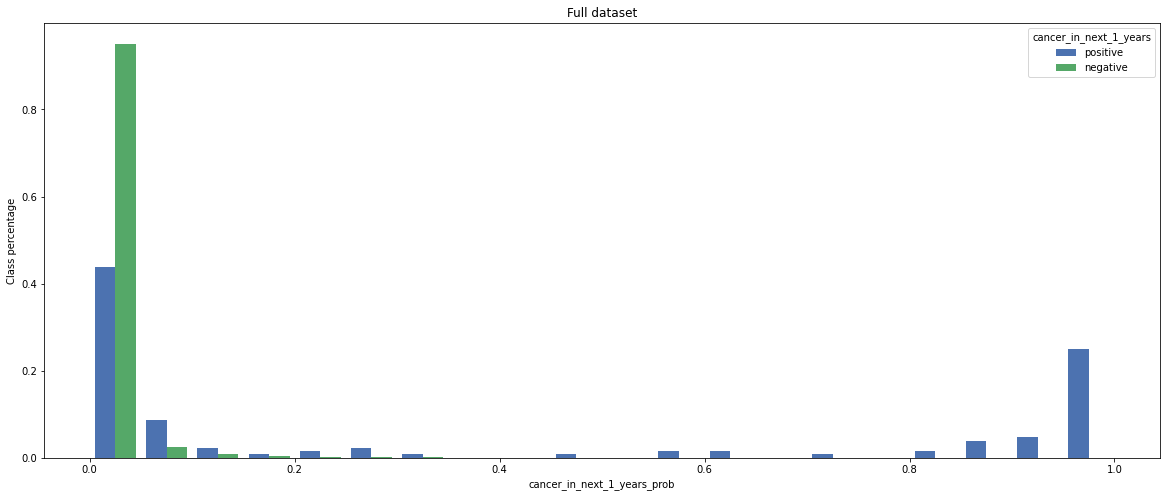

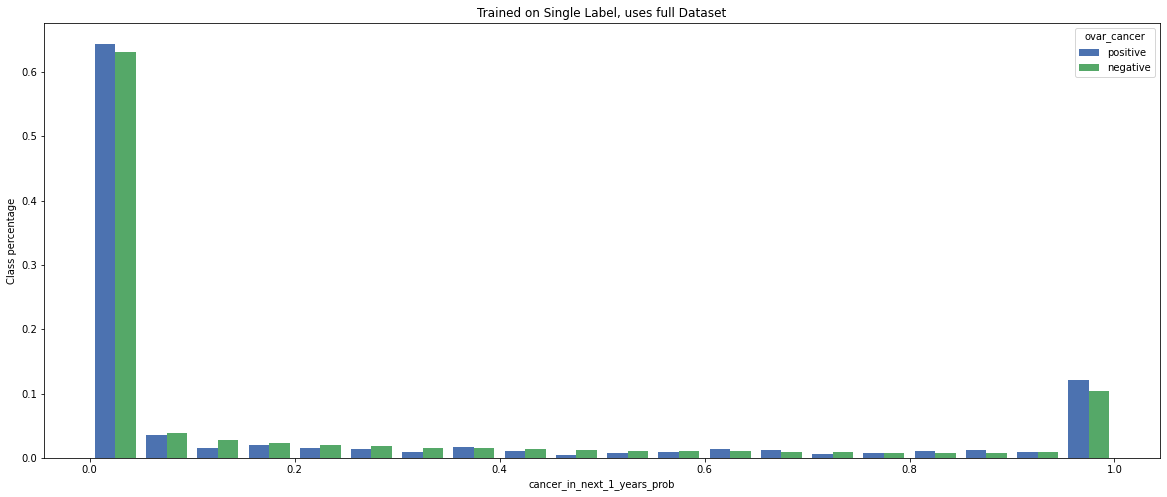

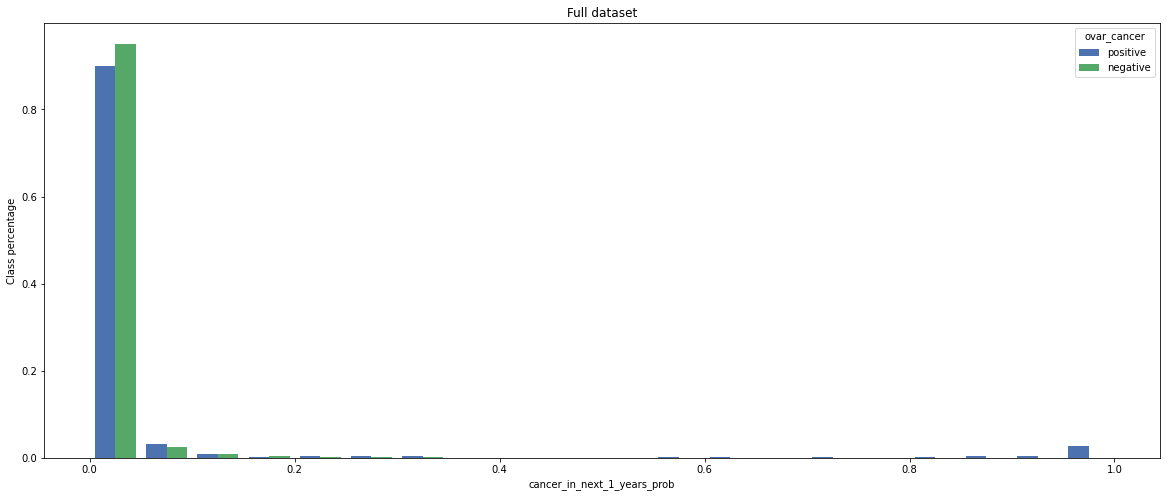

In [37]:

full_dataset = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', normalize = True, title='Trained on Single Label, uses full Dataset')
full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')

full_dataset = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Trained on Single Label, uses full Dataset')
full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')

In [38]:
print([col for col in full_dataset.columns if 'year' in col])

['cancer_in_next_1_years', 'cig_years', 'ovar_cancer_years', 'ovar_observe_year', 'pack_years', 'cancer_in_next_1_years_pred', 'cancer_in_next_1_years_prob']




Cross-Validation measures:
+--------------------+-------------+-------------+----------+------------+
|                    |        mean |         std |      min |        max |
|--------------------+-------------+-------------+----------+------------|
| precision__class_0 | 0.99904     | 0.000209549 | 0.998631 | 0.999342   |
| recall__class_0    | 0.949685    | 0.00627827  | 0.934483 | 0.957029   |
| f1-score__class_0  | 0.973727    | 0.00328607  | 0.965679 | 0.977531   |
| precision__class_1 | 0.000957433 | 0.00119223  | 0        | 0.00338983 |
| recall__class_1    | 0.0529491   | 0.06444     | 0        | 0.176471   |
| f1-score__class_1  | 0.00187973  | 0.00233896  | 0        | 0.00665188 |
| accuracy           | 0.948821    | 0.00622194  | 0.933639 | 0.95605    |
| auc                | 0.505001    | 0.0848735   | 0.390825 | 0.681717   |
+--------------------+-------------+-------------+----------+------------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


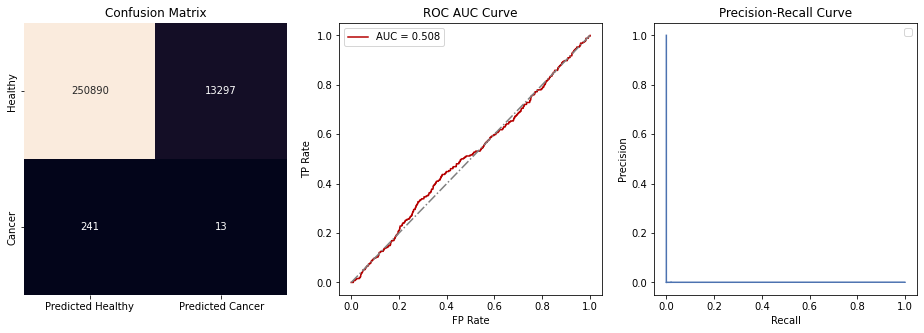

In [39]:
cv_analytics_util_not_screened = load_cv_analytics_util_see_stats('experiment_not_screened_cols_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [40]:
def extract_full_dataset_filter_cancer(cv_analytics_util):
    full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
    full_dataset = full_dataset[full_dataset['ovar_cancer'] == 1]
    full_dataset = full_dataset[full_dataset['ovar_cancer_years'] <= 5]
    return full_dataset

def plot_diff_in_confidence(full_dataset, title=''):
    
    grouped_df = full_dataset.groupby(['plco_id'])
    diff_df = []

    for key, item in grouped_df:
        diff = {}
        group = grouped_df.get_group(key)
        group = group.sort_values('study_yr').reset_index()
        diff['plco_id'] = group.loc[0, 'plco_id']
        years = group['study_yr'].unique()
        max_year = 6 - len(years)
        # max_year = 0
        for year in range(len(years) - 1):
            diff[f'cancer_in_next_1_years_{int(max_year + year+1)}-{int(max_year + year)}'] = group.loc[year+1, 'cancer_in_next_1_years_prob'] - group.loc[year, 'cancer_in_next_1_years_prob']
            # if len(years) == 5:
            #     print(diff)
        diff_df.append(diff)

    ordered_cols = []
    for i in range(5):
        ordered_cols.append(f'cancer_in_next_1_years_{i+1}-{i}')
        
    diff_df = pd.DataFrame(diff_df)

    diff_df = diff_df[['plco_id'] + ordered_cols]
    print_df(diff_df.describe().T)
    x = list(range(-1, -6, -1))
    stats = diff_df.describe()
    y = np.array(stats.loc['mean'].to_list())
    ci = np.array(stats.loc['std'].to_list())
    plt.plot(x, y)
    plt.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
    plt.ylabel("Probability of getting cancer")
    plt.xlabel("Years before getting cancer")
    plt.ylim([0, 1])
    plt.title(title)

In [41]:
def plot_change_in_confidence(full_dataset, title = ''):    
    grouped_df = full_dataset.groupby(['plco_id'])
    diff_df = []

    for key, item in grouped_df:
        diff = {}
        group = grouped_df.get_group(key)
        group = group.sort_values('study_yr').reset_index()
        diff['plco_id'] = group.loc[0, 'plco_id']
        years = group['study_yr'].unique()
        max_year = 6 - len(years)
        # max_year = 0
        for year in range(len(years)):
            diff[f'cancer_in_next_1_years_{int(max_year + year)}'] = group.loc[year, 'cancer_in_next_1_years_prob']
            # if len(years) == 5:
            #     print(diff)
        diff_df.append(diff)

    ordered_cols = []
    for i in range(6):
        ordered_cols.append(f'cancer_in_next_1_years_{i}')

    diff_df = pd.DataFrame(diff_df)

    diff_df = diff_df[['plco_id'] + ordered_cols]
    print_df(diff_df.describe().T)
    x = sorted(list(range(-1, -7, -1)))
    stats = diff_df.describe()
    y = np.array(stats.loc['mean'].to_list())
    ci = np.array(stats.loc['std'].to_list())
    plt.plot(x, y)
    plt.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
    plt.ylabel("Probability of getting cancer")
    plt.xlabel("Years before getting cancer")
    plt.ylim([0, 1])
    plt.title(title)

In [42]:
list(range(-1, -7, -1))

[-1, -2, -3, -4, -5, -6]

In [43]:
# plot_diff_in_confidence(cv_analytics_util_not_screened, title='Year over year change in probability before getting cancer based on questionaire')

X-axis -1 means that somewhere withing the next year person gets cancer. -2 means somewhere between year -1 and 0 person gets cancer.

+--------------------------+---------+----------+-----------+------------+-----------+----------+----------+----------+
|                          |   count |     mean |       std |        min |       25% |      50% |      75% |      max |
|--------------------------+---------+----------+-----------+------------+-----------+----------+----------+----------|
| cancer_in_next_1_years_0 |       9 | 0.159012 | 0.0980688 | 0.0188118  | 0.0990359 | 0.181143 | 0.194415 | 0.345969 |
| cancer_in_next_1_years_1 |      25 | 0.154461 | 0.119493  | 0.00837054 | 0.0776424 | 0.142602 | 0.201667 | 0.507029 |
| cancer_in_next_1_years_2 |      46 | 0.169869 | 0.139227  | 0.00430384 | 0.05957   | 0.149957 | 0.240485 | 0.633694 |
| cancer_in_next_1_years_3 |      65 | 0.156367 | 0.129073  | 0.00430384 | 0.0538542 | 0.120936 | 0.233376 | 0.633694 |
| cancer_in_next_1_years_4 |      95 | 0.158283 | 0.126488  | 0.00430384 | 0.055128  | 0.117308 | 0.23225  | 0.633694 |
| cancer_in_next_1_years_5 |     254 | 0

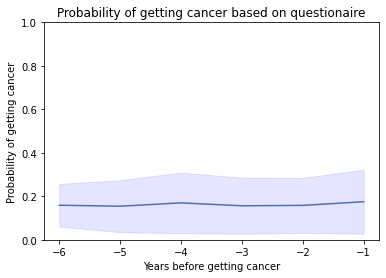

In [44]:
full_dataset = extract_full_dataset_filter_cancer(cv_analytics_util_not_screened)
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire')

+--------------------------+---------+------------+------------+-------------+------------+------------+------------+-----------+
|                          |   count |       mean |        std |         min |        25% |        50% |        75% |       max |
|--------------------------+---------+------------+------------+-------------+------------+------------+------------+-----------|
| cancer_in_next_1_years_0 |       9 | 0.00669121 | 0.00566307 | 0.000633523 | 0.00231124 | 0.00333126 | 0.0106984  | 0.0169807 |
| cancer_in_next_1_years_1 |      25 | 0.00857586 | 0.0189     | 0.000383665 | 0.00175772 | 0.00296566 | 0.00532274 | 0.0950095 |
| cancer_in_next_1_years_2 |      46 | 0.0134051  | 0.0481818  | 0.000217078 | 0.00134714 | 0.00387177 | 0.00753295 | 0.328944  |
| cancer_in_next_1_years_3 |      65 | 0.0270566  | 0.122689   | 0.000198047 | 0.00158685 | 0.00603547 | 0.0113754  | 0.987446  |
| cancer_in_next_1_years_4 |      95 | 0.0675897  | 0.200425   | 0.000198047 | 0.00186625 

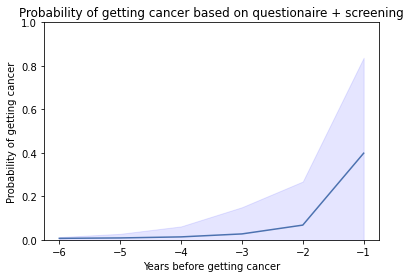

In [45]:
full_dataset = extract_full_dataset_filter_cancer(cv_analytics_util)
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening')

+--------------------------+---------+-----------+-----------+-------------+------------+------------+------------+----------+
|                          |   count |      mean |       std |         min |        25% |        50% |        75% |      max |
|--------------------------+---------+-----------+-----------+-------------+------------+------------+------------+----------|
| cancer_in_next_1_years_0 |   21891 | 0.0116256 | 0.0427306 | 5.56495e-05 | 0.00123561 | 0.00291783 | 0.00789266 | 0.987486 |
| cancer_in_next_1_years_1 |   25366 | 0.0127818 | 0.0446853 | 4.10353e-05 | 0.0011947  | 0.00290607 | 0.00821894 | 0.993553 |
| cancer_in_next_1_years_2 |   27192 | 0.0126275 | 0.0449808 | 4.91262e-05 | 0.00122226 | 0.00296265 | 0.00835561 | 0.991243 |
| cancer_in_next_1_years_3 |   28787 | 0.0133696 | 0.0518542 | 5.84529e-05 | 0.00121282 | 0.00296122 | 0.00822607 | 0.994513 |
| cancer_in_next_1_years_4 |   30816 | 0.0144322 | 0.0517954 | 6.04674e-05 | 0.00131792 | 0.00326439 | 0.009039

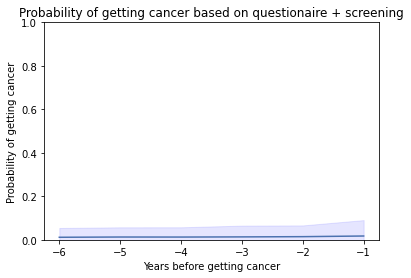

In [46]:
full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening')

In [47]:
full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')

threshold = 0.2
idx = full_dataset[(full_dataset['cancer_in_next_1_years_prob'] >= threshold) & (full_dataset['ovar_cancer'] == 0)]['plco_id'].unique()
full_dataset = full_dataset[full_dataset['plco_id'].isin(idx)]
full_dataset = full_dataset[full_dataset['study_yr'] >= 0]
full_dataset = full_dataset[full_dataset['ovar_observe_year'] <= 5]
dict_years_pred = {}
 
for plco_id in full_dataset['plco_id'].unique():
    # TODO: i can change min and max
    dict_years_pred[plco_id] = full_dataset[(full_dataset['plco_id'] == plco_id) & (full_dataset['cancer_in_next_1_years_prob'] >= threshold)]['ovar_observe_year'].min()
    full_dataset = full_dataset[((full_dataset['plco_id'] == plco_id) & (full_dataset['ovar_observe_year'] <= dict_years_pred[plco_id])) | (full_dataset['plco_id'] != plco_id)]

+--------------------------+---------+-----------+-----------+-------------+------------+-----------+-----------+----------+
|                          |   count |      mean |       std |         min |        25% |       50% |       75% |      max |
|--------------------------+---------+-----------+-----------+-------------+------------+-----------+-----------+----------|
| cancer_in_next_1_years_0 |      49 | 0.0248494 | 0.0341243 | 0.000624935 | 0.0037199  | 0.011269  | 0.0306471 | 0.145416 |
| cancer_in_next_1_years_1 |     122 | 0.034183  | 0.0485673 | 0.000183095 | 0.00371787 | 0.0143227 | 0.0380207 | 0.192557 |
| cancer_in_next_1_years_2 |     213 | 0.0366221 | 0.0451066 | 0.000449269 | 0.00424182 | 0.0156061 | 0.054529  | 0.19156  |
| cancer_in_next_1_years_3 |     361 | 0.038602  | 0.0481653 | 0.000287728 | 0.00411007 | 0.0152907 | 0.0593944 | 0.198421 |
| cancer_in_next_1_years_4 |     533 | 0.0494145 | 0.0551329 | 0.000239296 | 0.00678557 | 0.0257282 | 0.083997  | 0.19836  |


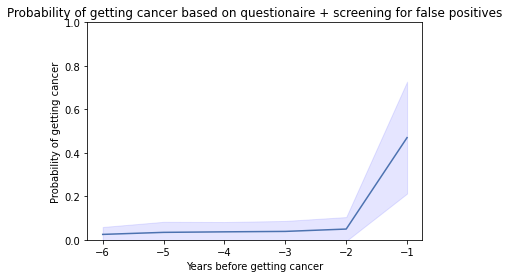

In [48]:
# full_dataset = full_dataset[full_dataset['cancer_in_next_1_years_prob'] >= threshold]
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening for false positives')